# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_retailers = pd.read_csv('/work/largest_us_retailers.csv')
df_retailers.head(10)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


In [ ]:
df_retailers.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.000000,23.000000,23.000000,23.000000
mean,71063.080000,3466.565217,36.870966,0.040230
std,125405.727644,4038.708714,40.625277,0.068552
min,16592.000000,231.000000,1.563919,-0.059515
25%,24402.000000,1029.000000,11.263462,-0.001860
50%,34980.000000,1828.000000,25.997733,0.019520
75%,71687.000000,4242.000000,41.358955,0.078934
max,658119.000000,14250.000000,187.795620,0.255662


In [ ]:
df_retailers.columns

Index(['Company', 'Sales', 'Stores', 'Sales/Avg. Store', 'Store Count Growth',
       'Category'],
      dtype='object')

Nombre y significado de cada columna:
- Company (compañía)
- Sales (ventas en millones de dólares)
- Stores (cantidad de tiendas físicas)
- Sales/Avg. Store (promedio de venta por tienda física)
- Category (categoría)

## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

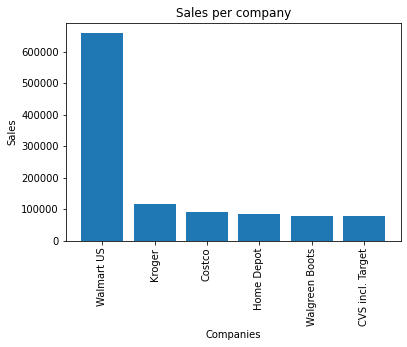

Promedio total de ventas teniendo en cuenta a la compania dominante: 71063.08


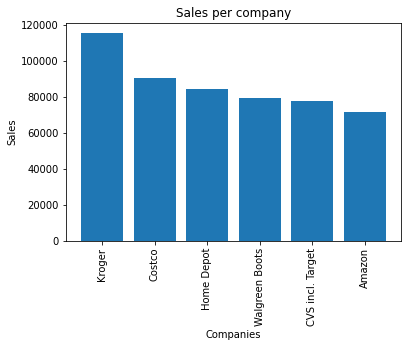

Promedio total de ventas teniendo en cuenta a la compania dominante: 46602.416666666664


In [ ]:
x = df_retailers['Company'][0:6] # Tomo las primeras 6 para que las graficas sean legibles
y = df_retailers['Sales'][0:6]

plt.bar(x, y)
plt.xlabel('Companies')
plt.ylabel('Sales')
plt.title('Sales per company')
plt.xticks(rotation='vertical')
plt.show()
print(f"Promedio total de ventas teniendo en cuenta a la compania dominante: {df_retailers['Sales'].mean()}")


df_retailers_sinWalmart = df_retailers[df_retailers['Company']!='Walmart US']

x = df_retailers_sinWalmart['Company'][0:6]
y = df_retailers_sinWalmart['Sales'][0:6]

plt.bar(x, y)
plt.xlabel('Companies')
plt.ylabel('Sales')
plt.title('Sales per company')
plt.xticks(rotation='vertical')
plt.show()
print(f"Promedio total de ventas teniendo en cuenta a la compania dominante: {df_retailers_sinWalmart['Sales'].mean()}")

##### Aspectos a destacar:

Como se puede observar en el primer grafico, la compania dominante es Walmart US y el promedio total de ventas teniendola en cuneta es de 71,063.08 dolares. Pero una ves que la sacamos de lado, como se ve en el segundo grafico, el promedio total de ventas baja a 46,602.41 dolares, en total bajo 34,42% aproximadamente.

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

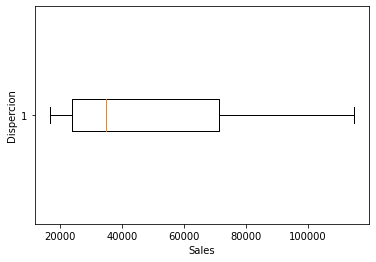

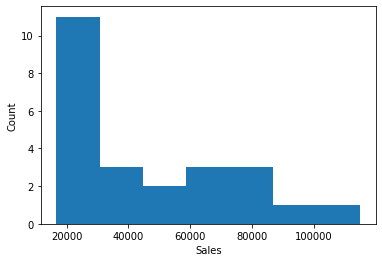

In [ ]:
plt.boxplot(data=df_retailers_sinWalmart, x='Sales', vert=False)
plt.xlabel('Sales')
plt.ylabel('Dispercion')
plt.show()

plt.hist(data=df_retailers_sinWalmart, x='Sales', bins=7)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

##### Aspesctos a destacar:

Como se puede apreciar en el histograma y el grafico de caja, la mayoria de las companias generaron un valor ventas de entre 15mil y 30mil doalers aproximadamante. De lo que podes sacar que la mayor parte de las empresas son tambien las que menor dinero en ventas generan.

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

<AxesSubplot:xlabel='Stores', ylabel='Count'>

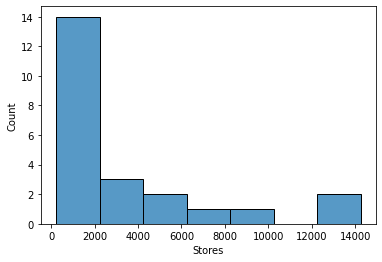

In [ ]:
sns.histplot(data=df_retailers, x='Stores')

##### Aspectos a destacar:

La mayoria de las companias tiene entre 200 y 2200 tiendas. De lo que podemos ver que la mayoria de las companias tiene pocas tiendas y eso podria estar relacionado con los insight de la pregunta anterior de que tambien pasaba que la mayoria de las tiendas generaban la menora cantidad de dnero en ventas.



### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

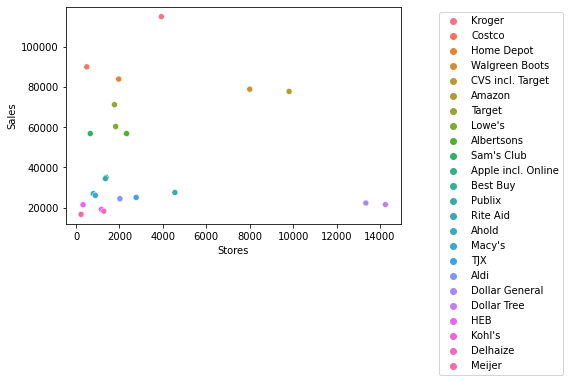

In [ ]:
sns.scatterplot(data=df_retailers_sinWalmart, x='Stores', y='Sales', hue='Company')
plt.legend(bbox_to_anchor=(1.0, 0., 0.5, 1.0))
plt.show()

##### Aspectos a destacar:

Como se puede ver en el grafico la cantidad de tiendas no necesariamente esta relacionada con la cantidad de ventas, tenemos todos los tipos:

- Hay empresas que tiene muchas ventas y pocas tiendas
- Empresas con pocas ventas y muchas tiendas
- Empresas con pocas pocas ventas y pocas tiendas
- Y empresas que tienen una relacion bastante estrecha entre la cantidad de ventas y de tiendas

### 5. ¿Cuál es el rango que existe entre las ventas?

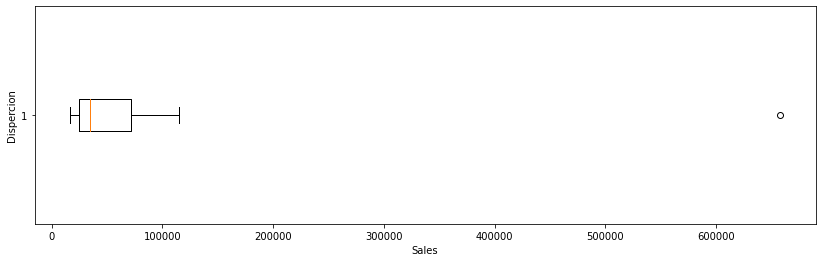

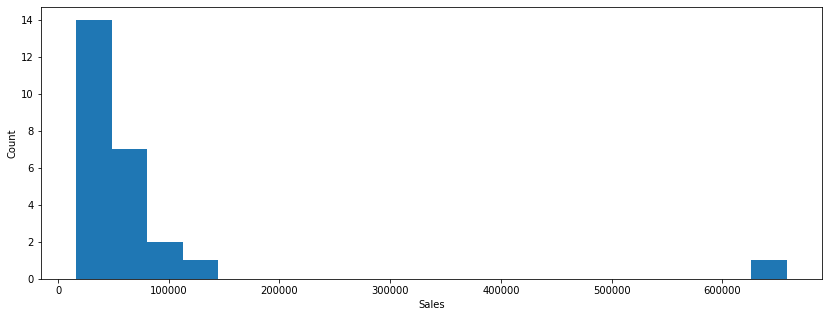

El rango de ventas es de: 641527


In [ ]:
plt.figure(figsize=(14, 4))
plt.boxplot(data=df_retailers, x='Sales', vert=False)
plt.xlabel('Sales')
plt.ylabel('Dispercion')
plt.show()

plt.figure(figsize=(14, 5))
plt.hist(data=df_retailers, x='Sales', bins=20)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

print(f"El rango de ventas es de: {df_retailers['Sales'].max() - df_retailers['Sales'].min()}")

##### Aspectos a destacar:

El rango entre las ventas es de 641,527 dolares de diferencia. Y es un rango tan grande por que consideramos a Walmart US, que es un outlier, como se ve en el grafico de caja. 

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

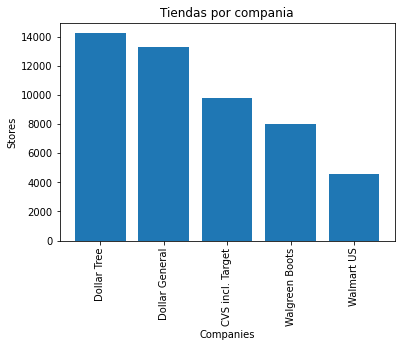

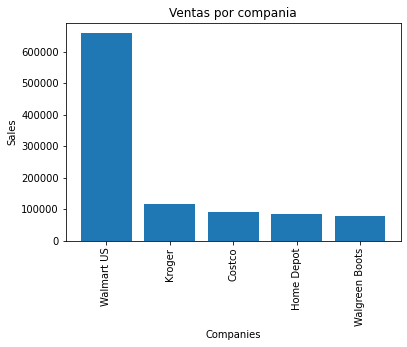

Las 5 empresas que mas tiendas fisicas tienen son: ['Dollar Tree', 'Dollar General', 'CVS incl. Target', 'Walgreen Boots', 'Walmart US']
Y ellas las que estan dentyro de las 5 que mas ventas tuvieron son: ['Walgreen Boots', 'Walmart US']


In [ ]:
df_sorted_stores = df_retailers.sort_values('Stores', ascending=0)
df_sorted_sales = df_retailers.sort_values('Sales', ascending=0)

stores = list(df_sorted_stores['Company'][0:5])
sales = list(df_sorted_sales['Company'][0:5])

estan = []
for i in stores:
    if i in sales:
        estan.append(i)

plt.bar(data=df_sorted_stores[0:5], x='Company', height='Stores')
plt.xticks(rotation='vertical')
plt.xlabel('Companies')
plt.ylabel('Stores')
plt.title('Tiendas por compania')
plt.show()

plt.bar(data=df_sorted_sales[0:5], x='Company', height='Sales')
plt.xticks(rotation='vertical')
plt.xlabel('Companies')
plt.ylabel('Sales')
plt.title('Ventas por compania')
plt.show()

print(f"Las 5 empresas que mas tiendas fisicas tienen son: {stores}")
print(f"Y ellas las que estan dentyro de las 5 que mas ventas tuvieron son: {estan}")

##### Aspecto a destacar:

Las 5 empresas que mas tiendas fisicas teinene son Dollar Tree, Dollar General, CVS incl. Target, Walgreen Boots y Walmart US. Y de esas 5 las que estan en el top 5 con mas ventas son Walgreen Boots y Walmart US.

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [ ]:
category = np.array(df_retailers['Category']) 
sales = np.array(df_retailers['Sales'])

sum = {}

for i in range(len(category)):
    if category[i] in sum:
        sum[category[i]] = sum.get(category[i]) + sales[i]
    else:
        sum[category[i]] = sales[i]

df = pd.DataFrame([[key, sum[key]] for key in sum.keys()], columns=['Category', 'Sales'])
df.sort_values('Sales', ascending=0)

,Category,Sales
0,Supercenters,745919
1,Grocery,297164
4,Drug Stores,184202
3,Home Improvement,144287
2,Warehouse Club,90048
5,Electronic/Mail Order,71687
6,Warehouse Clubs,56828
9,Department Stores,45088
11,Dollar Stores,43698
7,NaN,37664


##### Aspectos a destacar:

Como se puede ver en el dataframe, la categoria que genero mas ventas es Supercenters.

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

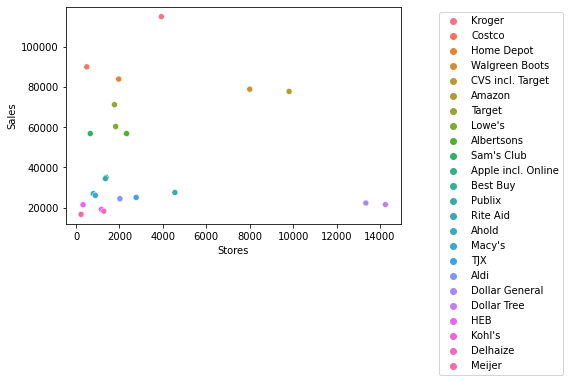

La compañía que en relación con su cantidad de tiendas físicas genera más ventas es: Costco con un promedio de 187.7956204 ventas por tienda


In [ ]:
sns.scatterplot(data=df_retailers_sinWalmart, x='Stores', y='Sales', hue='Company')
plt.legend(bbox_to_anchor=(1.0, 0., 0.5, 1.0))
plt.show()

df = df_retailers.groupby('Company')['Sales/Avg. Store'].sum().sort_values(ascending=False)
print(f'La compañía que en relación con su cantidad de tiendas físicas genera más ventas es: {df.index[0]} con un promedio de {df[0]} ventas por tienda')

##### Aspectos a destacar:

Como se puede ver en el scatterplott, la compania que genera mas ventas en relacion a su cantidad de tiendas fisicas es Costco.

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

Las copmpanias que vende de forma exclusivamente online son: ['Amazon' 'Apple incl. Online']


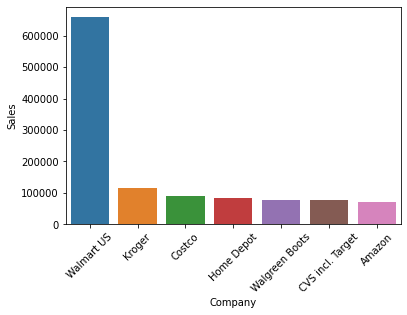

In [ ]:
df = df_retailers.copy(deep=True)
df.fillna(0, inplace=True)

online_stores = np.array(df.query('Stores == 0')['Company'])
print(f'Las copmpanias que vende de forma exclusivamente online son: {online_stores}')

sns.barplot(data=df[0:7], x='Company', y='Sales')
plt.xticks(rotation=45)
plt.show()

##### Aspectos a destacar:

Las compañias que venden de forma exclusivamente online son Amazon y Apple incl. Online. Y como se ve en el grfico de barras sus ventas no destacan sobre las compañias que tinen tiendas fisicas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0f7d41a4-45e2-4eb0-8aa6-6adf34adfb1b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>